In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quant-ori/Quantmetry.csv


In [2]:
import os
import sys
import operator
import numpy as np
import pandas as pd
import scipy
from scipy import sparse
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
import re

In [3]:
file ="../input/quant-ori/Quantmetry.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,02/06/2012,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,21/04/2011,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,07/09/2012,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,01/07/2011,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,07/08/2012,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [5]:
#Variable Description
def description(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

description(df)

Dataset Shape: (20000, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0,1,2
1,index,int64,0,20000,0,1,2
2,date,object,91,1826,02/06/2012,21/04/2011,07/09/2012
3,cheveux,object,103,4,roux,blond,blond
4,age,float64,91,76,25,35,29
5,exp,float64,96,25,9,13,13
6,salaire,float64,95,12326,26803,38166,35207
7,sexe,object,100,2,F,M,M
8,diplome,object,110,4,licence,licence,licence
9,specialite,object,93,4,geologie,forage,geologie


In [6]:
# Replacing missing values by the most repeat data(mod)e in the colomns 

def replace_nan(df):
    for column in df.columns:
        if df[column].isna().sum() > 0:
            df[column] = df[column].fillna(df[column].mode()[0])


replace_nan(df)

In [7]:
description(df)

Dataset Shape: (20000, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0,1,2
1,index,int64,0,20000,0,1,2
2,date,object,0,1826,02/06/2012,21/04/2011,07/09/2012
3,cheveux,object,0,4,roux,blond,blond
4,age,float64,0,76,25,35,29
5,exp,float64,0,25,9,13,13
6,salaire,float64,0,12326,26803,38166,35207
7,sexe,object,0,2,F,M,M
8,diplome,object,0,4,licence,licence,licence
9,specialite,object,0,4,geologie,forage,geologie


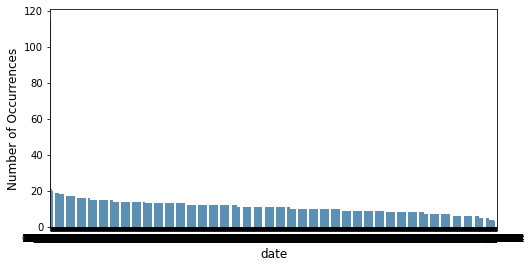

In [8]:
cnt_srs = df['date'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.show()

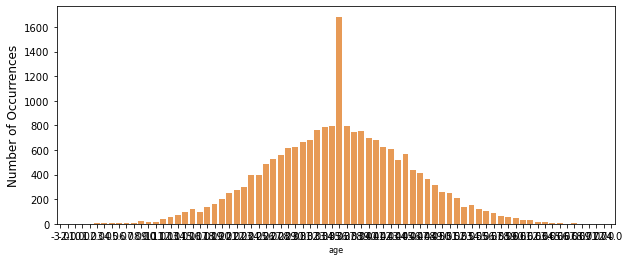

In [9]:
cnt_age = df['age'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_age.index, cnt_age.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('age', fontsize=8)
plt.show()

In [10]:
#Find imbalancement in the dataset vs label

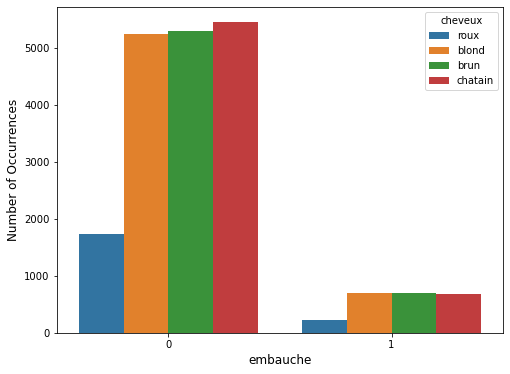

In [11]:
# 'roux' need to be integrate to the dataset 
plt.figure(figsize=(8,6))
sns.countplot(x='embauche', hue='cheveux', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('embauche', fontsize=12)
plt.show()

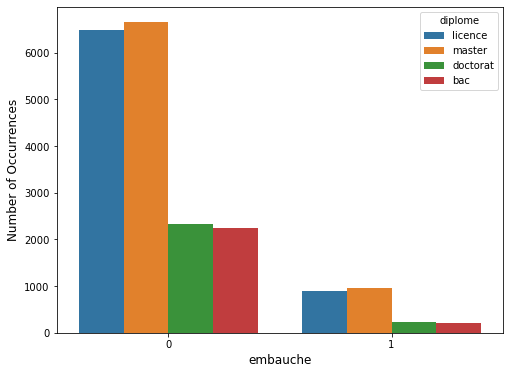

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='embauche', hue='diplome', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('embauche', fontsize=12)
plt.show()

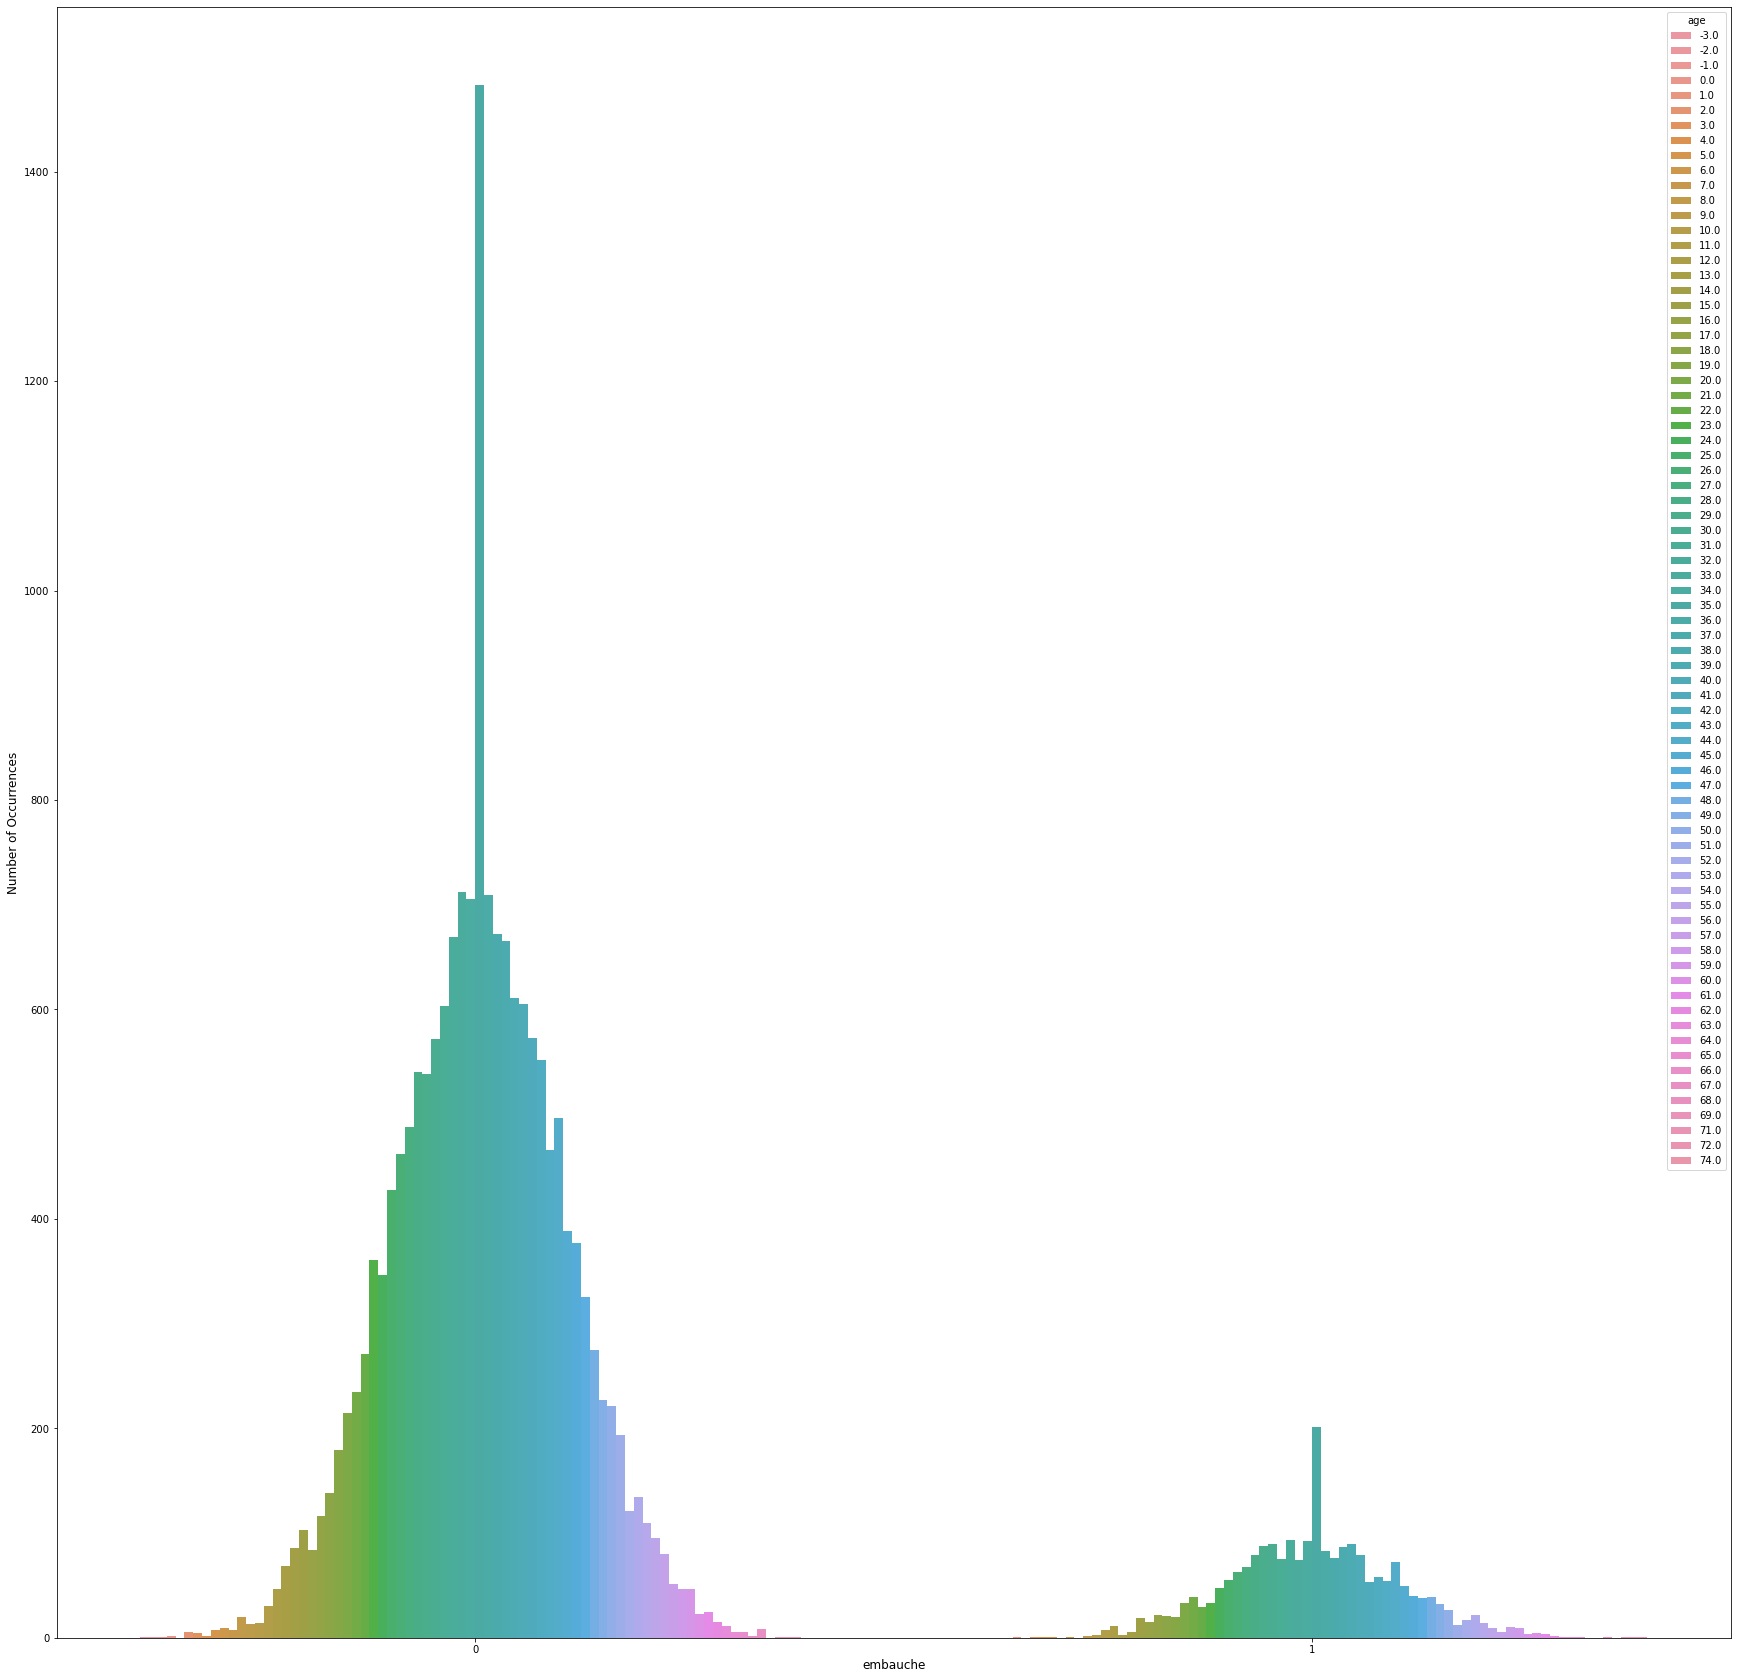

In [60]:
plt.figure(figsize=(30,30))
sns.countplot(x='embauche', hue='age', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('embauche', fontsize=12)
plt.show()

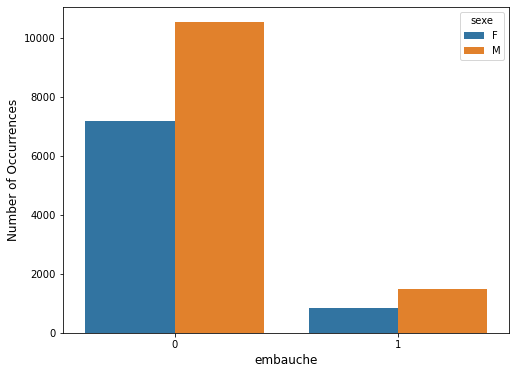

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='embauche', hue='sexe', data=df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('embauche', fontsize=12)
plt.show()

In [15]:
'''Plotly visualization .'''
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [16]:
#Delete date which have the most cardinality (see complete panda profiling-EDA) and marketplace in which the value is constant
df.drop('date',axis=1,inplace=True)

In [17]:
df

,Unnamed: 0,index,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,brun,35.0,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,19996,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,19997,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,19998,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


# Categorical encoding of cheveux, sexe, diplome, specialite, dispo

In [18]:
a = pd.get_dummies(df.sexe)
b = pd.get_dummies(df.dispo)

In [19]:
df_enc = pd.concat([df,a,b], axis = 1)
df_enc

,Unnamed: 0,index,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,F,M,non,oui
0,0,0,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0,1,0,1,0
1,1,1,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0,0,1,1,0
2,2,2,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0,0,1,1,0
3,3,3,brun,35.0,12.0,32442.0,M,licence,geologie,45.09,non,0,0,1,1,0
4,4,4,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0,0,1,1,0
19996,19996,19996,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1,1,0,1,0
19997,19997,19997,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0,1,0,0,1
19998,19998,19998,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0,1,0,1,0


In [20]:
df_enc = df_enc.drop(['sexe','dispo'], axis = 1)
df_enc

,Unnamed: 0,index,cheveux,age,exp,salaire,diplome,specialite,note,embauche,F,M,non,oui
0,0,0,roux,25.0,9.0,26803.0,licence,geologie,97.08,0,1,0,1,0
1,1,1,blond,35.0,13.0,38166.0,licence,forage,63.86,0,0,1,1,0
2,2,2,blond,29.0,13.0,35207.0,licence,geologie,78.50,0,0,1,1,0
3,3,3,brun,35.0,12.0,32442.0,licence,geologie,45.09,0,0,1,1,0
4,4,4,roux,35.0,6.0,28533.0,licence,detective,81.91,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,roux,47.0,9.0,35723.0,licence,geologie,66.47,0,0,1,1,0
19996,19996,19996,chatain,38.0,10.0,33570.0,master,geologie,62.29,1,1,0,1,0
19997,19997,19997,chatain,23.0,6.0,33751.0,doctorat,detective,103.48,0,1,0,0,1
19998,19998,19998,chatain,33.0,11.0,34167.0,licence,detective,73.35,0,1,0,1,0


In [21]:
df_enc

,Unnamed: 0,index,cheveux,age,exp,salaire,diplome,specialite,note,embauche,F,M,non,oui
0,0,0,roux,25.0,9.0,26803.0,licence,geologie,97.08,0,1,0,1,0
1,1,1,blond,35.0,13.0,38166.0,licence,forage,63.86,0,0,1,1,0
2,2,2,blond,29.0,13.0,35207.0,licence,geologie,78.50,0,0,1,1,0
3,3,3,brun,35.0,12.0,32442.0,licence,geologie,45.09,0,0,1,1,0
4,4,4,roux,35.0,6.0,28533.0,licence,detective,81.91,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,roux,47.0,9.0,35723.0,licence,geologie,66.47,0,0,1,1,0
19996,19996,19996,chatain,38.0,10.0,33570.0,master,geologie,62.29,1,1,0,1,0
19997,19997,19997,chatain,23.0,6.0,33751.0,doctorat,detective,103.48,0,1,0,0,1
19998,19998,19998,chatain,33.0,11.0,34167.0,licence,detective,73.35,0,1,0,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_enc['cheveux'] = labelencoder.fit_transform(df_enc['cheveux'])
df_enc['diplome'] = labelencoder.fit_transform(df_enc['diplome'])
df_enc['specialite'] = labelencoder.fit_transform(df_enc['specialite'])

In [23]:
df_enc

,Unnamed: 0,index,cheveux,age,exp,salaire,diplome,specialite,note,embauche,F,M,non,oui
0,0,0,3,25.0,9.0,26803.0,2,3,97.08,0,1,0,1,0
1,1,1,0,35.0,13.0,38166.0,2,2,63.86,0,0,1,1,0
2,2,2,0,29.0,13.0,35207.0,2,3,78.50,0,0,1,1,0
3,3,3,1,35.0,12.0,32442.0,2,3,45.09,0,0,1,1,0
4,4,4,3,35.0,6.0,28533.0,2,1,81.91,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,3,47.0,9.0,35723.0,2,3,66.47,0,0,1,1,0
19996,19996,19996,2,38.0,10.0,33570.0,3,3,62.29,1,1,0,1,0
19997,19997,19997,2,23.0,6.0,33751.0,1,1,103.48,0,1,0,0,1
19998,19998,19998,2,33.0,11.0,34167.0,2,1,73.35,0,1,0,1,0


In [24]:
description(df_enc)

Dataset Shape: (20000, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0.00,1.00,2.0
1,index,int64,0,20000,0.00,1.00,2.0
2,cheveux,int64,0,4,3.00,0.00,0.0
3,age,float64,0,76,25.00,35.00,29.0
4,exp,float64,0,25,9.00,13.00,13.0
5,salaire,float64,0,12326,26803.00,38166.00,35207.0
6,diplome,int64,0,4,2.00,2.00,2.0
7,specialite,int64,0,4,3.00,2.00,3.0
8,note,float64,0,6679,97.08,63.86,78.5
9,embauche,int64,0,2,0.00,0.00,0.0


# Dealing with high cardinlity of age

In [25]:
bins = [0, 20, 25, 30, 35, 40, 45 , np.inf]
names = ['<20', '20-25', '25-30','35-40','40-45', '45-55', '55+']

df_enc['AgeRange'] = pd.cut(df_enc['age'], bins, labels=names)

print(df_enc.dtypes)

Unnamed: 0       int64
index            int64
cheveux          int64
age            float64
exp            float64
salaire        float64
diplome          int64
specialite       int64
note           float64
embauche         int64
F                uint8
M                uint8
non              uint8
oui              uint8
AgeRange      category
dtype: object


In [26]:
# Replacing missing values by the most repeat data(mod)e in the colomns 

def replace_nan(df_enc):
    for column in df_enc.columns:
        if df_enc[column].isna().sum() > 0:
            df_enc[column] = df_enc[column].fillna(df_enc[column].mode()[0])


replace_nan(df_enc)

In [27]:
description(df_enc)

Dataset Shape: (20000, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0,1,2
1,index,int64,0,20000,0,1,2
2,cheveux,int64,0,4,3,0,0
3,age,float64,0,76,25,35,29
4,exp,float64,0,25,9,13,13
5,salaire,float64,0,12326,26803,38166,35207
6,diplome,int64,0,4,2,2,2
7,specialite,int64,0,4,3,2,3
8,note,float64,0,6679,97.08,63.86,78.5
9,embauche,int64,0,2,0,0,0


In [28]:
df_enc['AgeRange'] = labelencoder.fit_transform(df_enc['AgeRange'])

In [29]:
description(df_enc)

Dataset Shape: (20000, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0.00,1.00,2.0
1,index,int64,0,20000,0.00,1.00,2.0
2,cheveux,int64,0,4,3.00,0.00,0.0
3,age,float64,0,76,25.00,35.00,29.0
4,exp,float64,0,25,9.00,13.00,13.0
5,salaire,float64,0,12326,26803.00,38166.00,35207.0
6,diplome,int64,0,4,2.00,2.00,2.0
7,specialite,int64,0,4,3.00,2.00,3.0
8,note,float64,0,6679,97.08,63.86,78.5
9,embauche,int64,0,2,0.00,0.00,0.0


In [30]:
df_enc.drop('age',axis=1,inplace=True)

In [31]:
description(df_enc)

Dataset Shape: (20000, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Unnamed: 0,int64,0,20000,0.00,1.00,2.0
1,index,int64,0,20000,0.00,1.00,2.0
2,cheveux,int64,0,4,3.00,0.00,0.0
3,exp,float64,0,25,9.00,13.00,13.0
4,salaire,float64,0,12326,26803.00,38166.00,35207.0
5,diplome,int64,0,4,2.00,2.00,2.0
6,specialite,int64,0,4,3.00,2.00,3.0
7,note,float64,0,6679,97.08,63.86,78.5
8,embauche,int64,0,2,0.00,0.00,0.0
9,F,uint8,0,2,1.00,0.00,0.0


# Scaling of salary, note, exp 

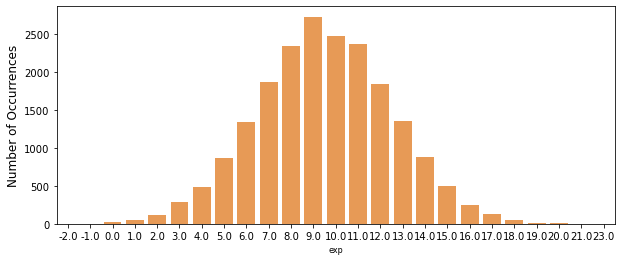

In [32]:
cnt_exp = df['exp'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_exp.index, cnt_exp.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('exp', fontsize=8)
plt.show()

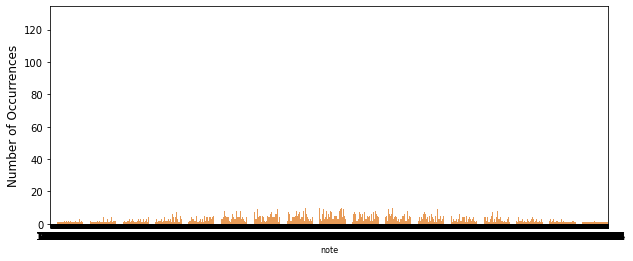

In [33]:
cnt_note = df['note'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_note.index, cnt_note.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('note', fontsize=8)
plt.show()

# Label ('embauche') representation

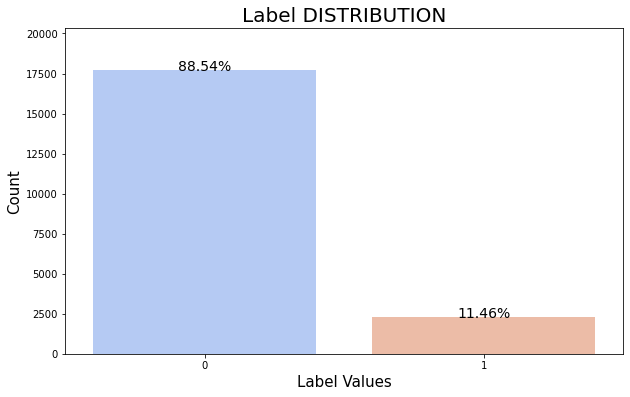

In [34]:
# A clear histogram representation of the numbers of embauche, 11.46% hiring  againt 88.54% non hired.
total = len(df_enc)
plt.figure(figsize=(10,6))

g = sns.countplot(x='embauche', data=df_enc, palette='coolwarm')
g.set_title("Label DISTRIBUTION", fontsize = 20)
g.set_xlabel("Label Values", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
sizes=[] # Get highest values in y
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights

plt.show()

# Important features for embauche predictions

In [38]:
X = df_enc.drop(['embauche', 'Unnamed: 0','index'], axis = 1) 
y = df_enc.embauche  
X.shape,y.shape


((20000, 11), (20000,))

[0.0733967  0.13155959 0.2184988  0.04670275 0.11337785 0.2965516
 0.00472815 0.00620618 0.01281146 0.01424831 0.08191862]


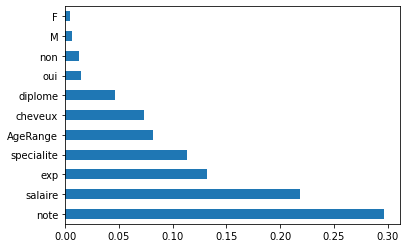

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# The 5 most important parameters are : Salary, note, exp, specialite, AgeRange

# Normalisation de Salaire, note, exp

Text(0.5, 1.0, 'Scaled salaire')

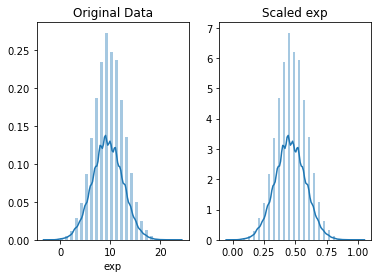

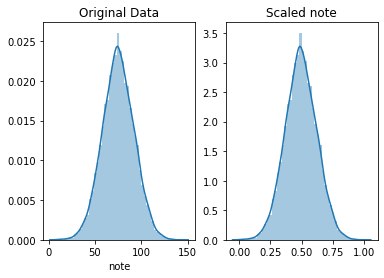

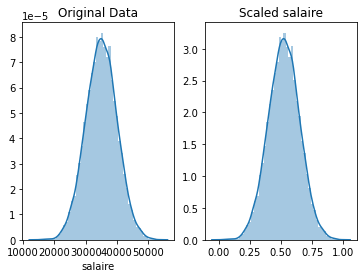

In [40]:

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# mix-max scale the data between 0 and 1
scaled_exp = minmax_scaling(df_enc, columns = ['exp'])
scaled_note = minmax_scaling(df_enc, columns = ['note'])
scaled_salaire = minmax_scaling(df_enc, columns = ['salaire'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_enc.exp, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_exp, ax=ax[1])
ax[1].set_title("Scaled exp")

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_enc.note, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_note, ax=ax[1])
ax[1].set_title("Scaled note")

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df_enc.salaire, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_salaire, ax=ax[1])
ax[1].set_title("Scaled salaire")



In [41]:
df_scaled = df_enc.drop(['exp','note','salaire'], axis = 1)
df_scaled

,Unnamed: 0,index,cheveux,diplome,specialite,embauche,F,M,non,oui,AgeRange
0,0,0,3,2,3,0,1,0,1,0,0
1,1,1,0,2,2,0,0,1,1,0,2
2,2,2,0,2,3,0,0,1,1,0,1
3,3,3,1,2,3,0,0,1,1,0,2
4,4,4,3,2,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,3,2,3,0,0,1,1,0,5
19996,19996,19996,2,3,3,1,1,0,1,0,3
19997,19997,19997,2,1,1,0,1,0,0,1,0
19998,19998,19998,2,2,1,0,1,0,1,0,2


In [42]:
df_scale_finale = pd.concat([df_scaled,scaled_exp,scaled_note,scaled_salaire], axis = 1)
df_scale_finale

,Unnamed: 0,index,cheveux,diplome,specialite,embauche,F,M,non,oui,AgeRange,exp,note,salaire
0,0,0,3,2,3,0,1,0,1,0,0,0.44,0.657054,0.318076
1,1,1,0,2,2,0,0,1,1,0,2,0.60,0.410138,0.603227
2,2,2,0,2,3,0,0,1,1,0,1,0.60,0.518953,0.528972
3,3,3,1,2,3,0,0,1,1,0,2,0.56,0.270626,0.459585
4,4,4,3,2,1,0,1,0,1,0,2,0.32,0.544299,0.361490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,3,2,3,0,0,1,1,0,5,0.44,0.429538,0.541921
19996,19996,19996,2,3,3,1,1,0,1,0,3,0.48,0.398469,0.487892
19997,19997,19997,2,1,1,0,1,0,0,1,0,0.32,0.704623,0.492434
19998,19998,19998,2,2,1,0,1,0,1,0,2,0.52,0.480675,0.502873


# Save the finale preprocess file 

In [43]:
df_scale_finale.to_csv('df_scale_finale', index = False, header=True)

# Define Finale X_scaled, y_scaled

In [44]:
X_scaled = df_scale_finale.drop('embauche',axis = 1)
y_scaled = df_scale_finale['embauche']
X_scaled,y_scaled

(       Unnamed: 0  index  cheveux  diplome  specialite  F  M  non  oui  \
 0               0      0        3        2           3  1  0    1    0   
 1               1      1        0        2           2  0  1    1    0   
 2               2      2        0        2           3  0  1    1    0   
 3               3      3        1        2           3  0  1    1    0   
 4               4      4        3        2           1  1  0    1    0   
 ...           ...    ...      ...      ...         ... .. ..  ...  ...   
 19995       19995  19995        3        2           3  0  1    1    0   
 19996       19996  19996        2        3           3  1  0    1    0   
 19997       19997  19997        2        1           1  1  0    0    1   
 19998       19998  19998        2        2           1  1  0    1    0   
 19999       19999  19999        1        0           3  0  1    1    0   
 
        AgeRange   exp      note   salaire  
 0             0  0.44  0.657054  0.318076  
 1      

# Save the finale Best features file 

In [45]:
df_mi = df_scale_finale[['salaire','note','exp','specialite','AgeRange','cheveux',  'diplome','embauche']]
df_mi

,salaire,note,exp,specialite,AgeRange,cheveux,diplome,embauche
0,0.318076,0.657054,0.44,3,0,3,2,0
1,0.603227,0.410138,0.60,2,2,0,2,0
2,0.528972,0.518953,0.60,3,1,0,2,0
3,0.459585,0.270626,0.56,3,2,1,2,0
4,0.361490,0.544299,0.32,1,2,3,2,0
...,...,...,...,...,...,...,...,...
19995,0.541921,0.429538,0.44,3,5,3,2,0
19996,0.487892,0.398469,0.48,3,3,2,3,1
19997,0.492434,0.704623,0.32,1,0,2,1,0
19998,0.502873,0.480675,0.52,1,2,2,2,0


In [46]:
df_mi.to_csv('df_mi', index = False, header=True)

# Define correlation matrix

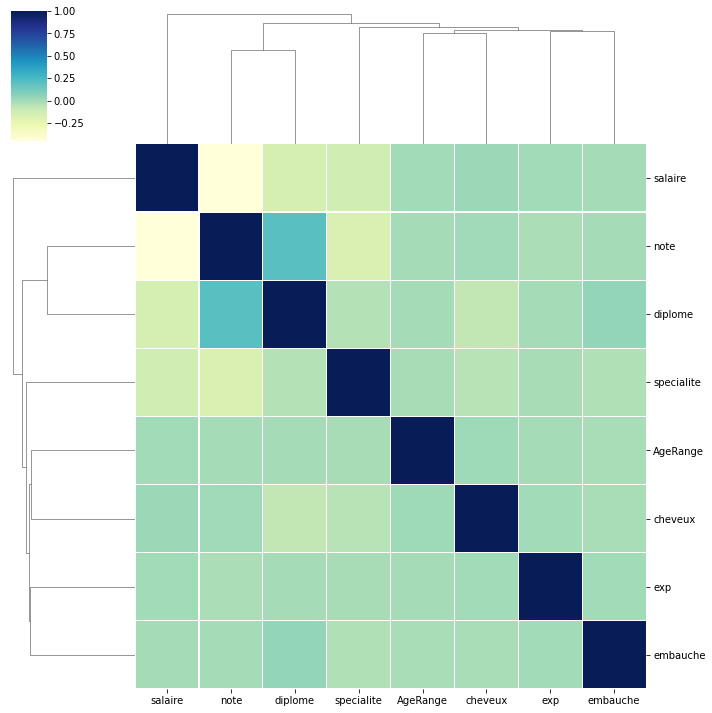

In [58]:
corrmat = df_mi.corr(method='spearman')
cg = sns.clustermap(corrMatrix, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

In [62]:
!pip install jovian
import jovian

     |████████████████████████████████| 66 kB 303 kB/s eta 0:00:011
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=e19466d218d7a7d33b1140165e1284591b59303a998ce8e5103b29519e427f0b
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


<IPython.core.display.Javascript object>

In [63]:
jovian.commit(project='Quant EDA')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ai/yeonathan/Quant EDA


<IPython.core.display.Javascript object>